# Linear Regression Examples

In [10]:
import pylab
import tensorflow as tf
import numpy as np

In [3]:
#parameters
learning_rate = 0.1
epochs = 1000 
step = 50

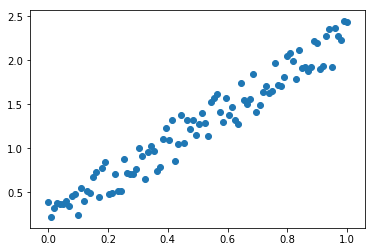

In [30]:
#test data
X = np.linspace(0,1,100)
noise = np.random.random(100)*0.5
y = 2*X + noise
n = X.shape[0]
#show the data
pylab.scatter(X,y)
pylab.show()

In [31]:
#tf required setting 
tf_X = tf.placeholder("float")
tf_y = tf.placeholder("float")
#tf learning parameters
w = tf.Variable(np.random.random(),name="weight")
b = tf.Variable(np.random.random(),name="bias")

In [32]:
#a linear model
pred = tf.add(tf.multiply(tf_X,w),b)
cost = tf.reduce_sum(tf.pow(pred-tf_y,2)) / (2*n)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch:0,cost:0.37425,w:0.337981,b:0.396868


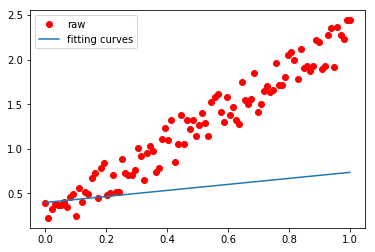

Epoch:50,cost:0.053237,w:1.05059,b:0.778923


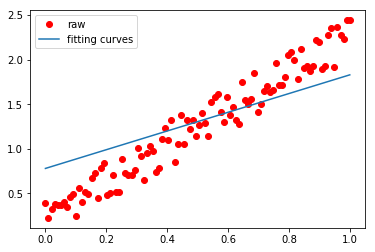

Epoch:100,cost:0.0320497,w:1.33556,b:0.624457


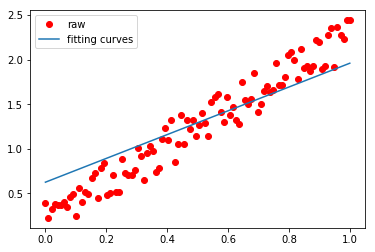

Epoch:150,cost:0.0212148,w:1.53893,b:0.513253


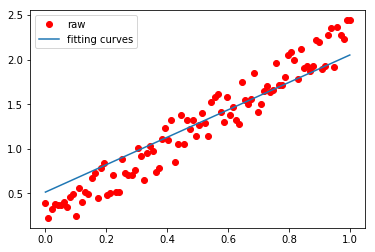

Epoch:200,cost:0.0156789,w:1.68435,b:0.433736


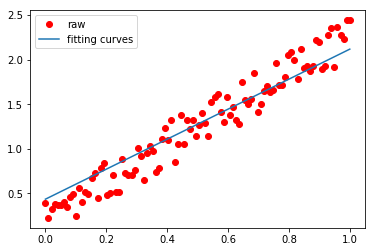

Epoch:250,cost:0.0128513,w:1.78834,b:0.376877


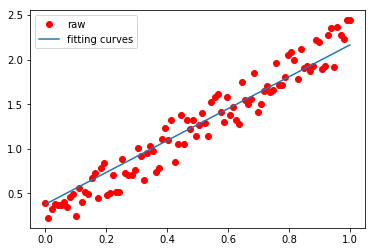

Epoch:300,cost:0.0114077,w:1.86269,b:0.336219


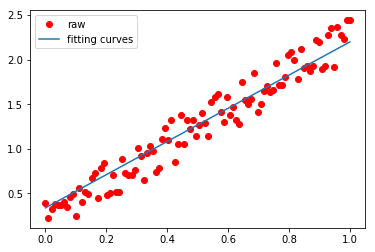

Epoch:350,cost:0.010671,w:1.91586,b:0.307146


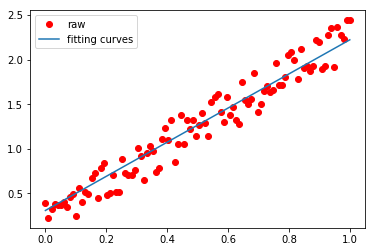

Epoch:400,cost:0.0102953,w:1.95388,b:0.286357


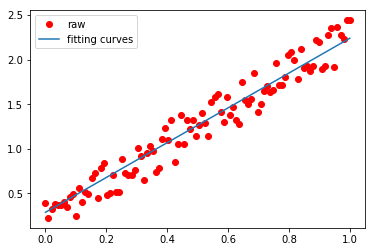

Epoch:450,cost:0.0101041,w:1.98106,b:0.271493


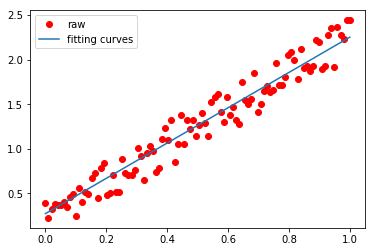

Epoch:500,cost:0.0100068,w:2.00051,b:0.260862


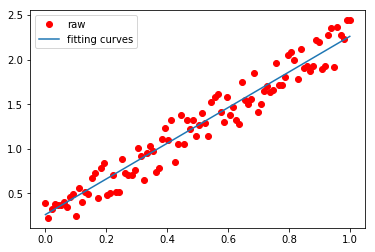

Epoch:550,cost:0.00995745,w:2.0144,b:0.253261


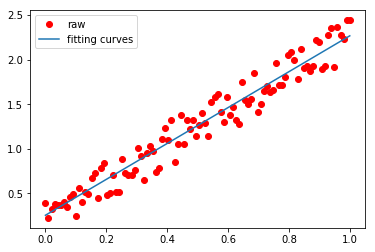

Epoch:600,cost:0.00993249,w:2.02435,b:0.247826


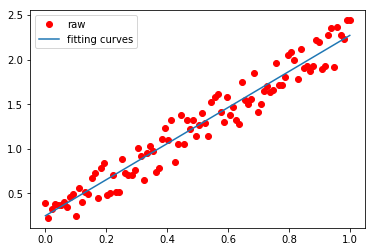

Epoch:650,cost:0.00991994,w:2.03145,b:0.243939


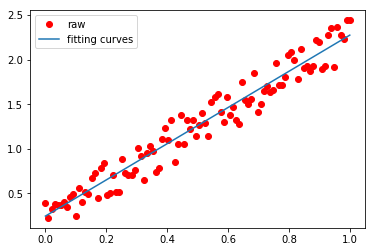

Epoch:700,cost:0.00991366,w:2.03653,b:0.241161


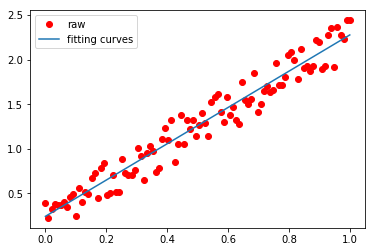

Epoch:750,cost:0.00991056,w:2.04016,b:0.239177


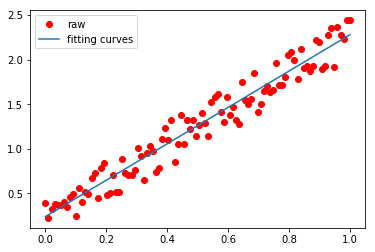

Epoch:800,cost:0.00990904,w:2.04275,b:0.237758


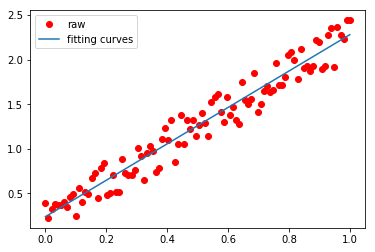

Epoch:850,cost:0.00990831,w:2.04462,b:0.236743


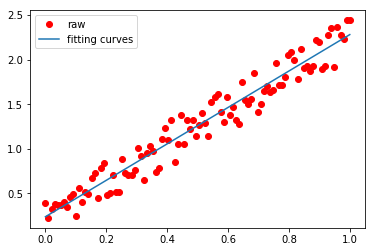

Epoch:900,cost:0.00990798,w:2.04596,b:0.236009


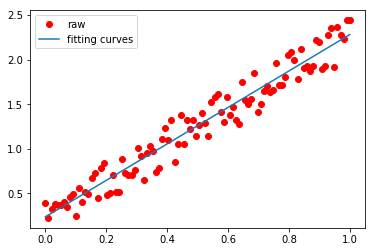

Epoch:950,cost:0.00990784,w:2.04688,b:0.2355


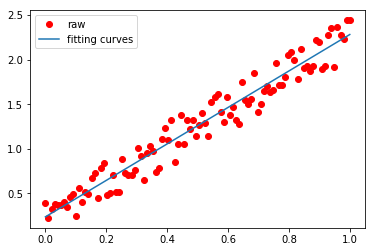

In [33]:
#tf graph for running
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in xrange(epochs):
        for (nx,ny) in zip (X,y):
            sess.run(optimizer,feed_dict={tf_X:nx,tf_y:ny})
        if epoch % step == 0:
            c = sess.run(cost,feed_dict={tf_X:X,tf_y:y})
            print("Epoch:%s,cost:%s,w:%s,b:%s"%(epoch,c,sess.run(w),sess.run(b)))
            pylab.plot(X,y,"ro",label="raw")
            pylab.plot(X,sess.run(w)*X+sess.run(b),label="fitting curves")
            pylab.legend()
            pylab.show()